# <font color='red'>Implement SGD Classifier with Logloss and L2 regularization Using SGD without using sklearn</font>

**There will be some functions that start with the word "grader" ex: grader_weights(), grader_sigmoid(), grader_logloss() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

<font color='red'> Importing packages</font>

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import math 
from math import log
from tqdm import tqdm

<font color='red'>Creating custom dataset</font>

In [2]:
# please don't change random_state
X, y = make_classification(n_samples=100000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)
# make_classification is used to create custom dataset 
# Please check this link (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) for more details

In [3]:
X.shape, y.shape

((100000, 15), (100000,))

<font color='red'>Splitting data into train and test </font>

In [4]:
#please don't change random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [5]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((75000, 15), (75000,), (25000, 15), (25000,))

# <font color='red' size=5>SGD classifier</font>

In [6]:
# alpha : float
# Constant that multiplies the regularization term. 

# eta0 : double
# The initial learning rate for the ‘constant’, ‘invscaling’ or ‘adaptive’ schedules.

clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
clf
# Please check this documentation (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) 

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=15, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=2, warm_start=False)

In [7]:
clf.fit(X=X_train, y=y_train) # fitting our model

-- Epoch 1
Norm: 0.81, NNZs: 15, Bias: -0.381062, T: 75000, Avg. loss: 0.391304
Total training time: 0.03 seconds.
-- Epoch 2
Norm: 0.86, NNZs: 15, Bias: -0.521099, T: 150000, Avg. loss: 0.362367
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 0.88, NNZs: 15, Bias: -0.599986, T: 225000, Avg. loss: 0.360442
Total training time: 0.07 seconds.
-- Epoch 4
Norm: 0.88, NNZs: 15, Bias: -0.644974, T: 300000, Avg. loss: 0.359811
Total training time: 0.09 seconds.
-- Epoch 5
Norm: 0.88, NNZs: 15, Bias: -0.669516, T: 375000, Avg. loss: 0.359687
Total training time: 0.11 seconds.
-- Epoch 6
Norm: 0.88, NNZs: 15, Bias: -0.685974, T: 450000, Avg. loss: 0.359600
Total training time: 0.14 seconds.
-- Epoch 7
Norm: 0.88, NNZs: 15, Bias: -0.695493, T: 525000, Avg. loss: 0.359556
Total training time: 0.16 seconds.
-- Epoch 8
Norm: 0.89, NNZs: 15, Bias: -0.699684, T: 600000, Avg. loss: 0.359569
Total training time: 0.18 seconds.
Convergence after 8 epochs took 0.18 seconds


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=15, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=2, warm_start=False)

In [8]:
clf.coef_, clf.coef_.shape, clf.intercept_
#clf.coef_ will return the weights
#clf.coef_.shape will return the shape of weights
#clf.intercept_ will return the intercept term

(array([[ 0.43948126,  0.26982541, -0.13455194, -0.21564336, -0.11627783,
         -0.12717193, -0.04582784,  0.08015399, -0.14475679, -0.1237872 ,
          0.09263641, -0.2652704 , -0.41380145, -0.23966627,  0.26850939]]),
 (1, 15),
 array([-0.69968364]))



```
# This is formatted as code
```

## <font color='red' size=5> Implement Logistic Regression with L2 regularization Using SGD: without using sklearn </font>






1.  We will be giving you some functions, please write code in that functions only.

2.  After every function, we will be giving you expected output, please make sure that you get that output. 






<br>

* Initialize the weight_vector and intercept term to zeros (Write your code in <font color='blue'>def initialize_weights()</font>)

* Create a loss function (Write your code in <font color='blue'>def logloss()</font>) 

 $log loss = -1*\frac{1}{n}\Sigma_{for each Yt,Y_{pred}}(Ytlog10(Y_{pred})+(1-Yt)log10(1-Y_{pred}))$
- for each epoch:

    - for each batch of data points in train: (keep batch size=1)

        - calculate the gradient of loss function w.r.t each weight in weight vector (write your code in <font color='blue'>def gradient_dw()</font>)

        $dw^{(t)} = x_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))- \frac{λ}{N}w^{(t)})$ <br>

        - Calculate the gradient of the intercept (write your code in <font color='blue'> def gradient_db()</font>) <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>check this</a>

           $ db^{(t)} = y_n- σ((w^{(t)})^{T} x_n+b^{t}))$

        - Update weights and intercept (check the equation number 32 in the above mentioned <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>pdf</a>): <br>
        $w^{(t+1)}← w^{(t)}+α(dw^{(t)}) $<br>

        $b^{(t+1)}←b^{(t)}+α(db^{(t)}) $
    - calculate the log loss for train and test with the updated weights (you can check the python assignment 10th question)
    - And if you wish, you can compare the previous loss and the current loss, if it is not updating, then
        you can stop the training
    - append this loss in the list ( this will be used to see how loss is changing for each epoch after the training is over )


<font color='blue'>Initialize weights </font>

In [9]:
def initialize_weights(dim):
    ''' In this function, we will initialize our weights and bias'''
    w=np.zeros_like(dim)
    b=0

    return w,b

In [10]:
dim=X_train[0] 
w,b = initialize_weights(dim)
print('w =',(w))
print('b =',str(b))

w = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
b = 0


<font color='cyan'>Grader function - 1 </font>

In [11]:
dim=X_train[0] 
w,b = initialize_weights(dim)
def grader_weights(w,b):
    assert((len(w)==len(dim)) and b==0 and np.sum(w)==0.0)
    return True
grader_weights(w,b)

True

<font color='blue'>Compute sigmoid </font>

$sigmoid(z)= 1/(1+exp(-z))$

In [12]:
def sigmoid(z):
    if z < 0:
         return (1 - 1/(1+math.exp(z)))
    return (1/(1+math.exp(-z)))

<font color='cyan'>Grader function - 2</font>

In [13]:
def grader_sigmoid(z):
    val=sigmoid(z)
    assert(val==0.8807970779778823)
    return True
grader_sigmoid(2)

True

<font color='blue'> Compute loss </font>

$log loss = -1*\frac{1}{n}\Sigma_{for each Yt,Y_{pred}}(Ytlog10(Y_{pred})+(1-Yt)log10(1-Y_{pred}))$

In [14]:
def logloss(true,pred):
    loss = 0
    for i,j in zip(true,pred):
       
        loss += (- i* np.log10(j) - (1-i) * np.log10(1-j))

    return(loss/len(true))

<font color='cyan'>Grader function - 3</font>

In [15]:
def grader_logloss(true,pred):
    loss=logloss(true,pred)
    assert(loss==0.07644900402910389)
    return True

true=[1,1,0,1,0]
pred=[0.9,0.8,0.1,0.8,0.2]
grader_logloss(true,pred)


True

<font color='blue'>Compute gradient w.r.to  'w' </font>

$dw^{(t)} = x_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))- \frac{λ}{N}w^{(t)}$ <br>

In [16]:
def gradient_dw(x,y,w,b,alpha,N):
    '''In this function, we will compute the gardient w.r.to w '''
    z=np.dot(w,x.T)+b
    dw=x*(y-sigmoid(z))-(alpha/N)*w
        
    return dw

<font color='cyan'>Grader function - 4</font>

In [17]:
def grader_dw(x,y,w,b,alpha,N):
    grad_dw=gradient_dw(x,y,w,b,alpha,N)
    assert(np.sum(grad_dw)==2.613689585)
    return True

grad_x=np.array([-2.07864835,  3.31604252, -0.79104357, -3.87045546, -1.14783286,
       -2.81434437, -0.86771071, -0.04073287,  0.84827878,  1.99451725,
        3.67152472,  0.01451875,  2.01062888,  0.07373904, -5.54586092])

grad_y=0
grad_w,grad_b=initialize_weights(grad_x)
alpha=0.0001
N=len(X_train)
grader_dw(grad_x,grad_y,grad_w,grad_b,alpha,N)

True

<font color='blue'>Compute gradient w.r.to 'b' </font>

$ db^{(t)} = y_n- σ((w^{(t)})^{T} x_n+b^{t})$

In [18]:
 def gradient_db(x,y,w,b):
    '''In this function, we will compute gradient w.r.to b '''
    
    z=np.dot(x,w)+b
    db=y-(sigmoid(z))
    return db

<font color='cyan'>Grader function - 5</font>

In [19]:
def grader_db(x,y,w,b):
    grad_db=gradient_db(x,y,w,b)
    assert(grad_db==-0.5)
    return True
grad_x=np.array([-2.07864835,  3.31604252, -0.79104357, -3.87045546, -1.14783286,
       -2.81434437, -0.86771071, -0.04073287,  0.84827878,  1.99451725,
        3.67152472,  0.01451875,  2.01062888,  0.07373904, -5.54586092])
grad_y=0
grad_w,grad_b=initialize_weights(grad_x)
alpha=0.0001
N=len(X_train)
grader_db(grad_x,grad_y,grad_w,grad_b)

True

<font color='blue'> Implementing logistic regression</font>

In [20]:
def train(X_train,y_train,X_test,y_test,epochs,alpha,eta0):
    ''' In this function, we will implement logistic regression'''

    #Here eta0 is learning rate
    
    loss_list_train=[]
    loss_list_test=[]
    N=len(X_train) 
    
    #implement the code as follows
    
    # initalize the weights (call the initialize_weights(X_train[0]) function)
    w,b=initialize_weights(X_train[0])
    
    # calculating initial loss
    y_pred_train=[]
    for j in range(len(X_train)):
        z=np.dot(X_train[j],w)+b
        value=sigmoid(z)
        y_pred_train.append(value)
    loss_train=logloss(y_train,y_pred_train)
    loss_list_train.append(loss_train)
         
    y_pred_test=[]
    for j in range(len(X_test)):
        z=np.dot(X_test[j],w)+b
        value=sigmoid(z)
        y_pred_test.append(value)
    loss_test=logloss(y_test,y_pred_test)
    loss_list_test.append(loss_test)

    
    # for every epoch
   
    
    for i in tqdm(range(epochs)):
        loss_test=0
        loss_train=0
        
        #dw,db=0,0
        
        # for every data point(X_train,y_train)
        for x,y in zip(X_train,y_train):
            
            #compute gradient w.r.to w (call the gradient_dw() function)
            dw=gradient_dw(x,y,w,b,alpha,N)
            
            #compute gradient w.r.to b (call the gradient_db() function)
            db=gradient_db(x,y,w,b)
            
            #update w, b
            w=w+(eta0*dw)
            b=b+(eta0*db)
            
        # predict the output of x_train[for all data points in X_train] using w,b
        y_pred_train=[]
        for j in range(len(X_train)):
            z=np.dot(X_train[j],w)+b
            value=sigmoid(z)
            y_pred_train.append(value)
            
        #compute the loss between predicted and actual values (call the loss function)        
        loss_train=logloss(y_train,y_pred_train)
        # store all the train loss values in a list
        loss_list_train.append(loss_train)
        
        
        # predict the output of x_test[for all data points in X_test] using w,b
        y_pred_test=[]
        for j in range(len(X_test)):
            z=np.dot(X_test[j],w)+b
            value=sigmoid(z)
            y_pred_test.append(value)
            
        #compute the loss between predicted and actual values (call the loss function)
        loss_test=logloss(y_test,y_pred_test)
        # store all the test loss values in a list
        loss_list_test.append(loss_test)
        # you can also compare previous loss and current loss, if loss is not updating then stop the process and return w,b
        

    return w,b,loss_list_train,loss_list_test

In [21]:
alpha=0.0001
eta0=0.0001
N=len(X_train)
epochs=50
w,b,loss_list_train,loss_list_test=train(X_train,y_train,X_test,y_test,epochs,alpha,eta0)

100%|██████████| 50/50 [03:16<00:00,  3.93s/it]


<font color='red'>Goal of assignment</font>

Compare your implementation and SGDClassifier's the weights and intercept, make sure they are as close as possible i.e difference should be in terms of 10^-3

In [22]:
# these are the results we got after we implemented sgd and found the optimal weights and intercept
w-clf.coef_, b-clf.intercept_

(array([[-0.00095079, -0.00210328,  0.00710541,  0.00578369, -0.00309365,
          0.00392964,  0.00916451, -0.00843287,  0.00232732,  0.00540198,
         -0.00380145,  0.00166019,  0.0009483 ,  0.00225454,  0.0065444 ]]),
 array([-0.0051198]))

<font color='blue'>Plot epoch number vs train , test loss </font>

* epoch number on X-axis
* loss on Y-axis

In [23]:
x=loss_list_train
y=loss_list_test

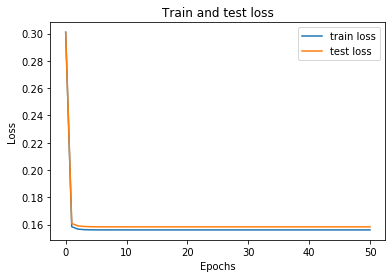

In [24]:
e=[i for i in range(0,51)]
import matplotlib.pyplot as plt
plt.plot(e,x,label='train loss')
plt.plot(e,y,label='test loss')
plt.title('Train and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [25]:
def pred(w,b, X):
    N = len(X)
    predict = []
    for i in range(N):
        z=np.dot(w,X[i])+b
        if sigmoid(z) >= 0.5: # sigmoid(w,x,b) returns 1/(1+exp(-(dot(x,w)+b)))
            predict.append(1)
        else:
            predict.append(0)
    return np.array(predict)
print(1-np.sum(y_train - pred(w,b,X_train))/len(X_train))
print(1-np.sum(y_test  - pred(w,b,X_test))/len(X_test))

0.9431333333333334
0.94224
